In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import random
from torchtext.vocab import GloVe
import matplotlib.pyplot as plt
torch.manual_seed(2)
glove = GloVe(name='6B', dim=50)

In [2]:
#Hyperparameters
batch_size = 128
epochs = 200
learning_rate = 3e-4
hidden_size = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(50, 5, dropout=0)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, 1)
        self.fc = nn.Linear(50, 1)
    def forward(self, tensor):
        tensor = self.transformer_encoder(tensor)
        tensor = tensor.mean(dim=0)
        tensor = self.fc(tensor)
        tensor = F.sigmoid(tensor)
        return tensor

In [4]:
import math

#This code is from pytorch documentation

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [5]:
class toGlove():
    def __init__(self):
        pass

    def toGloVe(self, batch_sentence):
        """
            Convert the tweets into GloVe embedding
            pre - batch of sentences
            post - a tensor representing the sentence, can directly input to 
                  rnn, with batch_first=False
        """

        batch_embedding=[]

        for sentence in batch_sentence:
            old_sentence=sentence
            sentence=sentence.replace(",", "")
            sentence=sentence.replace("-", " ")
            sentence=sentence.replace("--", " ")
            sentence=sentence.replace(":", "")
            sentence=sentence.replace(";", "")
            sentence=sentence.replace("!", ".")
            sentence=sentence.replace("?", ".")
            sentence=sentence.replace("\n", " ")
            sentence=sentence.replace("(", " ")
            sentence=sentence.replace(")", " ")
            sentence=sentence.replace("  ", " ")
            sentence=sentence.lower()

            list_of_embedding=[]
            sentence=sentence.split()
            
            if(len(sentence)>100):
                for i in range(100):
                    list_of_embedding.append(glove[sentence[i]])
            else:
                for word in sentence:
                    list_of_embedding.append(glove[word])
            
            list_of_embedding=torch.stack(list_of_embedding)

            batch_embedding.append(list_of_embedding)

        #Pad all the sentences so that they have the same length
        batch_embedding = nn.utils.rnn.pad_sequence(batch_embedding)

        return batch_embedding

In [6]:
positional_embedding = PositionalEncoding(hidden_size).to(device)
classifier = Classifier().to(device)
to_glove = toGlove()

In [7]:
optimizer = opt.Adam(classifier.parameters(), lr=learning_rate, weight_decay = 0.001)
criterion = nn.BCELoss()

In [8]:
#Read my tweets
read = open("Danjie_Tweets.txt", "r", encoding="latin1")
read = read.read()

read=read.replace("  ", " ")
read=read.lower()

read_list = read.split(".")
read_list_size = len(read_list)-1

In [9]:
x = []
y_real = []
y_fake = []

Epoch number 1
True Trump Loss:  0.60952421605587
Fake Trump Loss:  0.6448012137413025


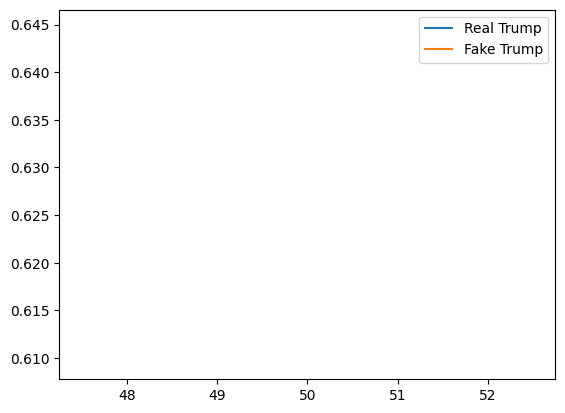

True Trump Loss:  0.4689403137564659
Fake Trump Loss:  0.47257442444562914


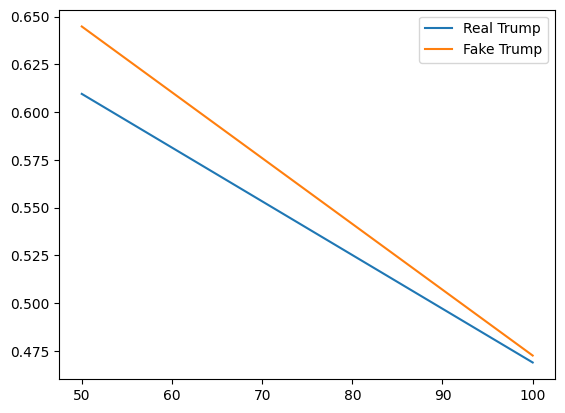

True Trump Loss:  0.33608068197965624
Fake Trump Loss:  0.24829757258296012


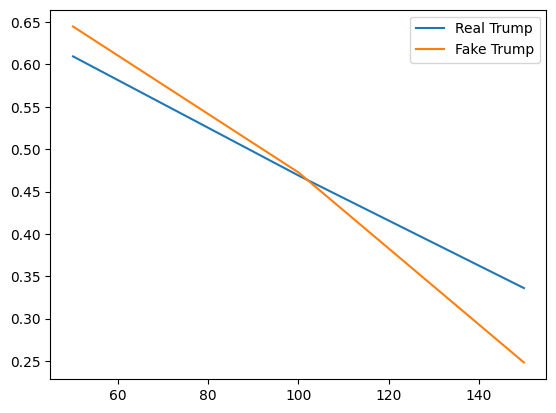

True Trump Loss:  0.261397213935852
Fake Trump Loss:  0.16486629381775855


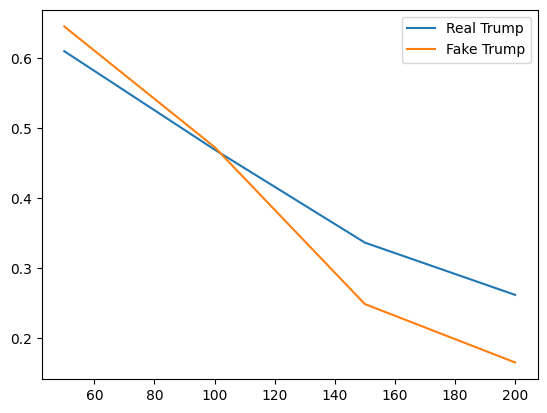

True Trump Loss:  0.23732375606894493
Fake Trump Loss:  0.18799226596951485


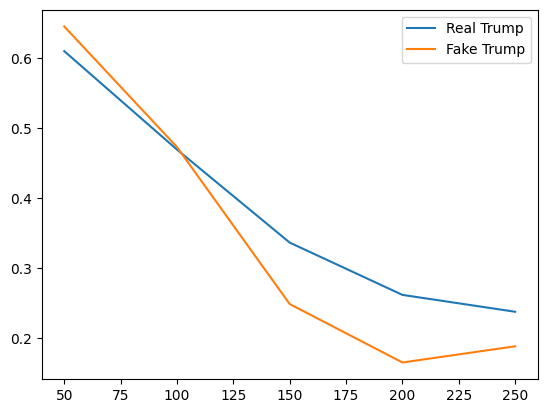

True Trump Loss:  0.08255474351346492
Fake Trump Loss:  0.07980811886489392


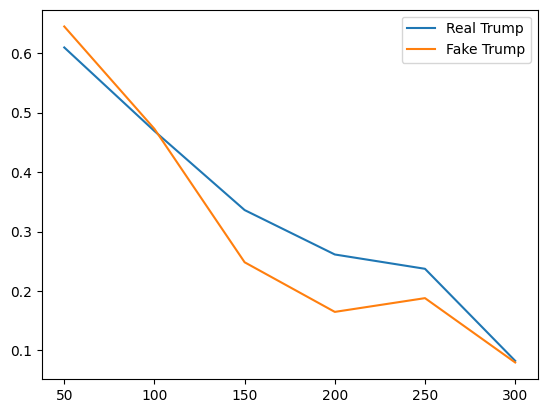

0.007972425781190395
Epoch number 2
True Trump Loss:  0.20368215044029056
Fake Trump Loss:  0.11334261341020464


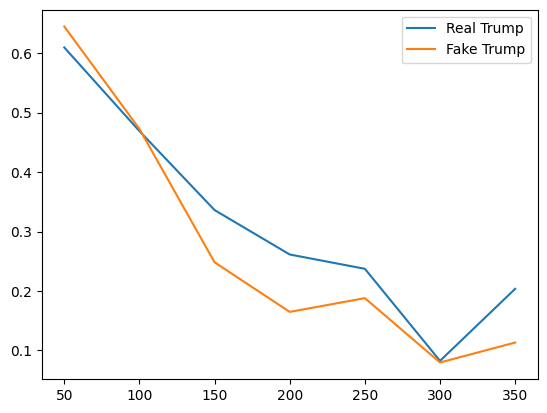

True Trump Loss:  0.16471148781478406
Fake Trump Loss:  0.14598855696618557


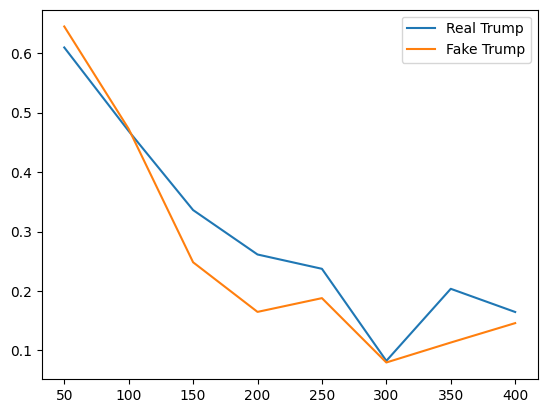

True Trump Loss:  0.16610850602388383
Fake Trump Loss:  0.11779351353645325


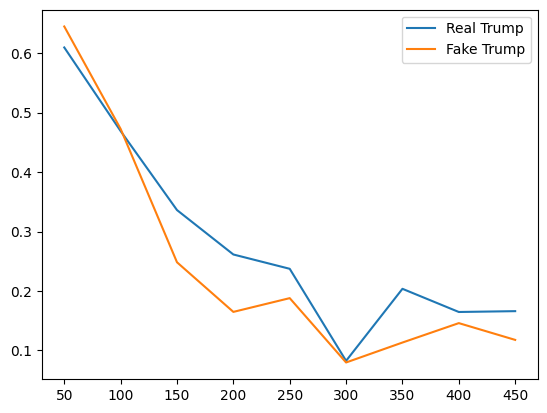

True Trump Loss:  0.1259919225797057
Fake Trump Loss:  0.06764328030869365


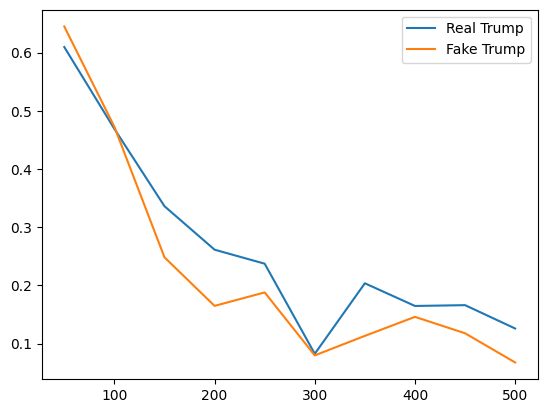

True Trump Loss:  0.1362352732103318
Fake Trump Loss:  0.09624959647655487


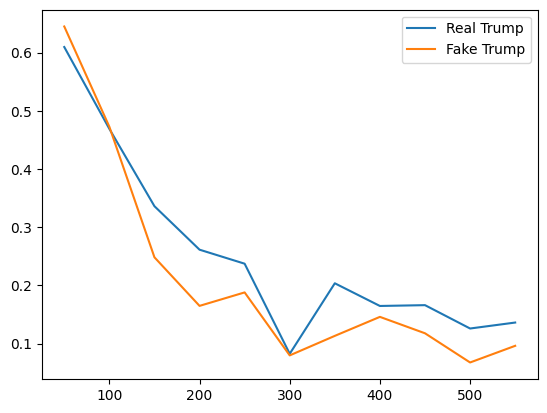

True Trump Loss:  0.11242202248424292
Fake Trump Loss:  0.0698345254547894


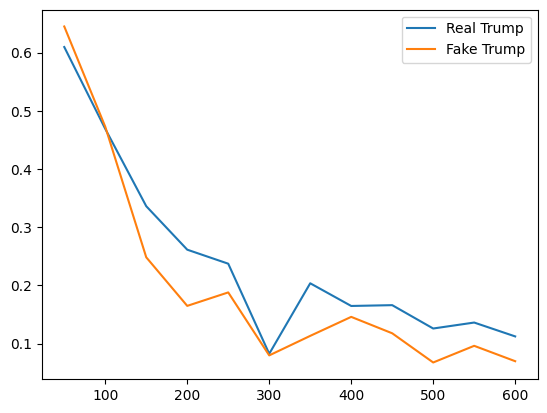

0.005689061246812344
Epoch number 3
True Trump Loss:  0.09366533122491091
Fake Trump Loss:  0.05494990503415465


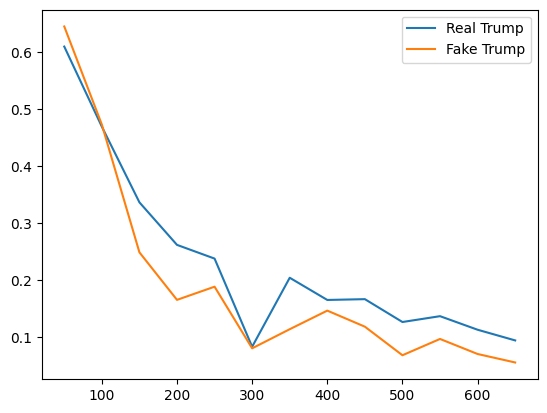

True Trump Loss:  0.1458396547846496
Fake Trump Loss:  0.08533750282600522


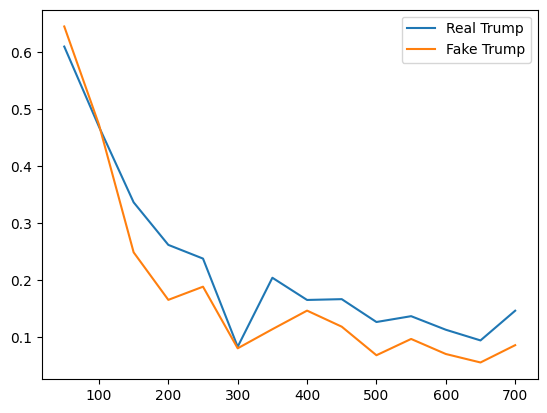

True Trump Loss:  0.11785154763609171
Fake Trump Loss:  0.07640640195459128


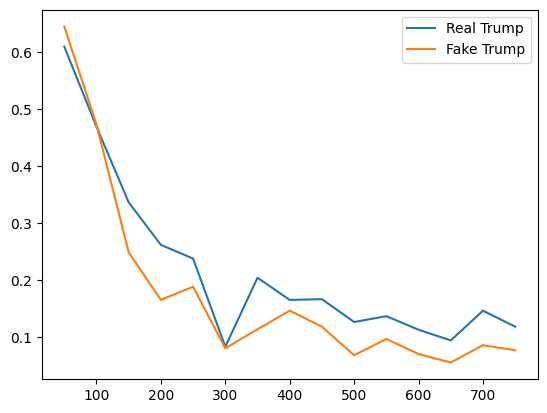

True Trump Loss:  0.10570469934027642
Fake Trump Loss:  0.07185623530298471


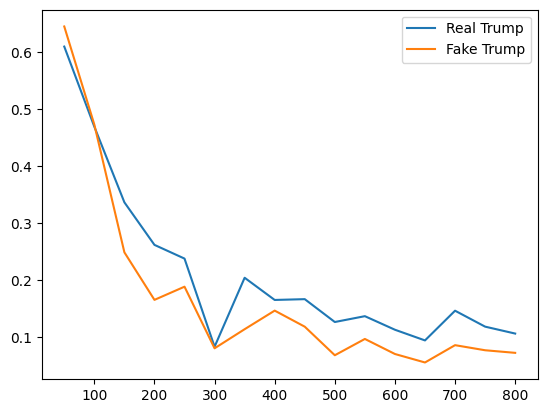

True Trump Loss:  0.12154849514830858
Fake Trump Loss:  0.0727011018525809


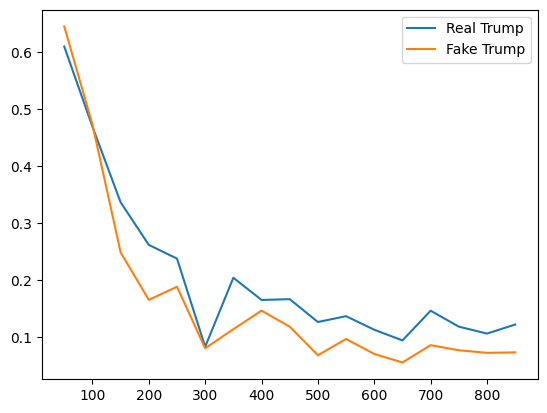

True Trump Loss:  0.12013655243441462
Fake Trump Loss:  0.0734783736243844


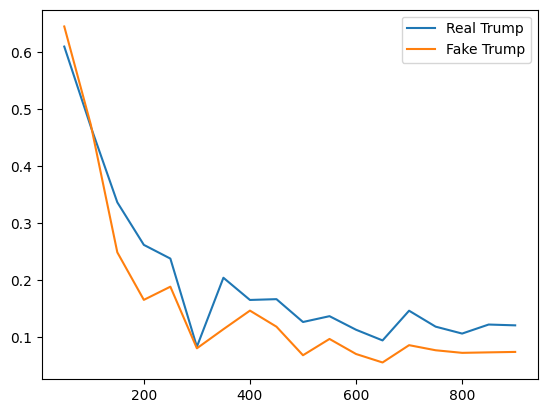

True Trump Loss:  0.01562837774865329
Fake Trump Loss:  0.021560697574168442


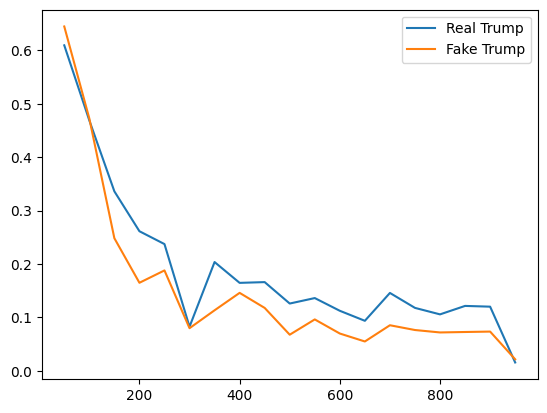

0.0036319708451628685
Epoch number 4
True Trump Loss:  0.1447871536249295
Fake Trump Loss:  0.06886405115481466


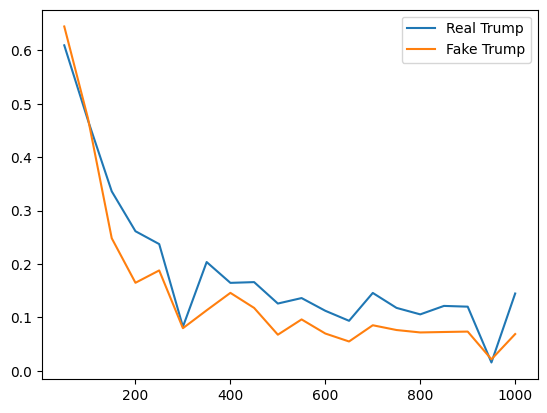

True Trump Loss:  0.09503759294748307
Fake Trump Loss:  0.0676567024178803


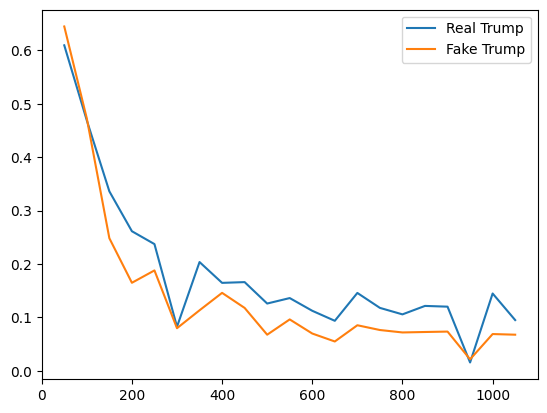

True Trump Loss:  0.10775568788871169
Fake Trump Loss:  0.06979236014187336


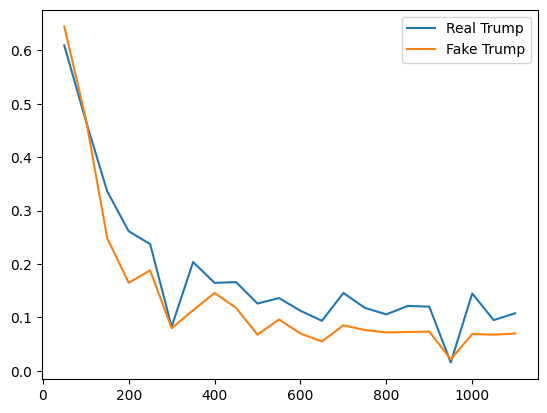

True Trump Loss:  0.07982652773149311
Fake Trump Loss:  0.043305719811469315


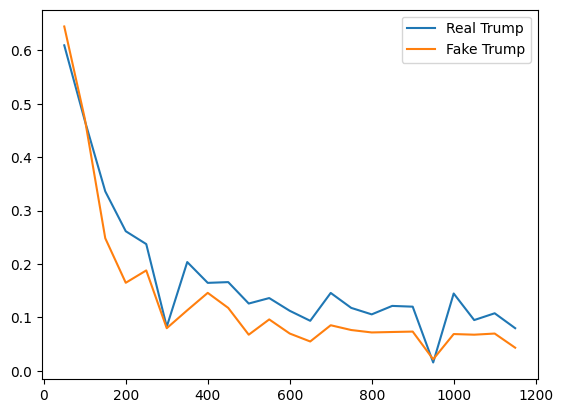

True Trump Loss:  0.10339764442294835
Fake Trump Loss:  0.06828007163479924


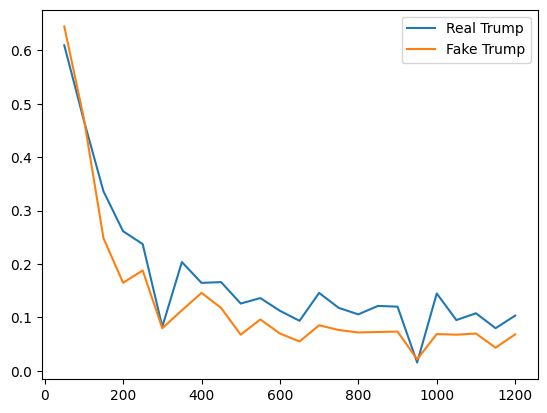

True Trump Loss:  0.06605405640322715
Fake Trump Loss:  0.043104459727182985


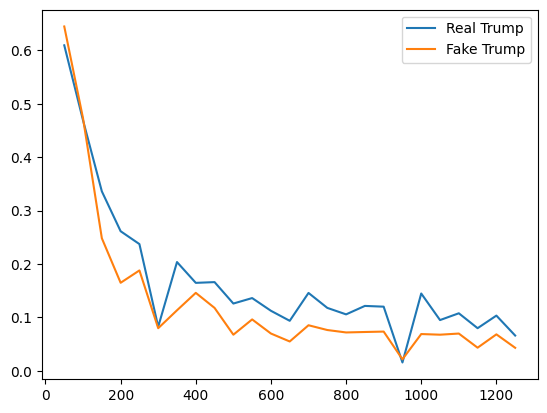

0.0034100180491805077
Epoch number 5
True Trump Loss:  0.06912446434376761
Fake Trump Loss:  0.03753019469790161


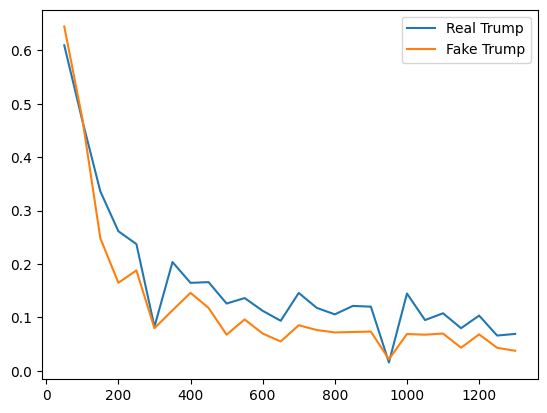

True Trump Loss:  0.09761827221140265
Fake Trump Loss:  0.05361988140270114


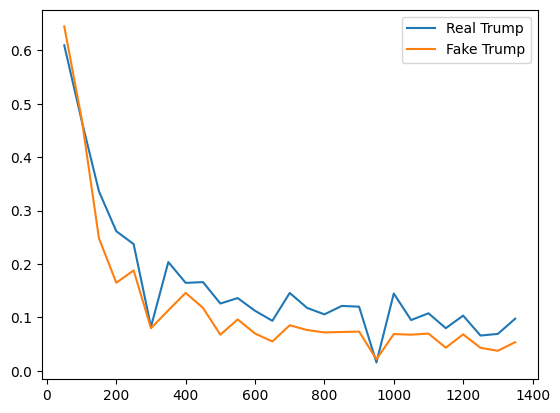

True Trump Loss:  0.11422319158911705
Fake Trump Loss:  0.07524932629428804


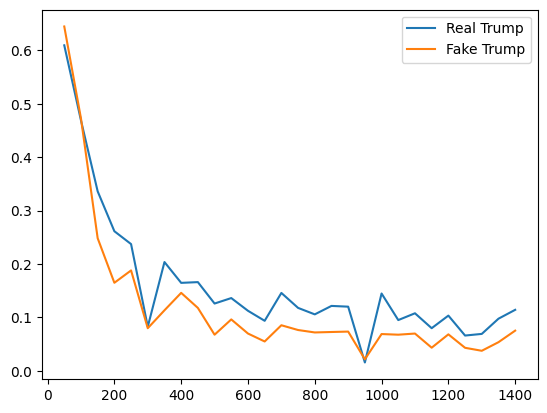

True Trump Loss:  0.07897034789435566
Fake Trump Loss:  0.0497153040394187


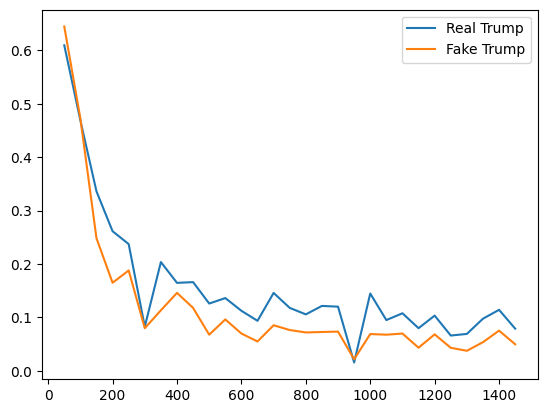

True Trump Loss:  0.0792709323274903
Fake Trump Loss:  0.047115490399301053


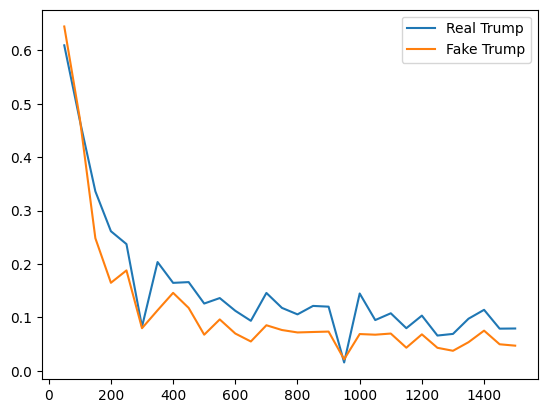

True Trump Loss:  0.09166688799858093
Fake Trump Loss:  0.05961230933666229


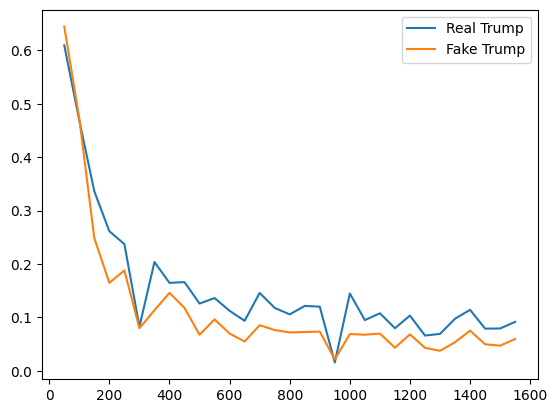

True Trump Loss:  0.004872719458071515
Fake Trump Loss:  0.009276965707540512


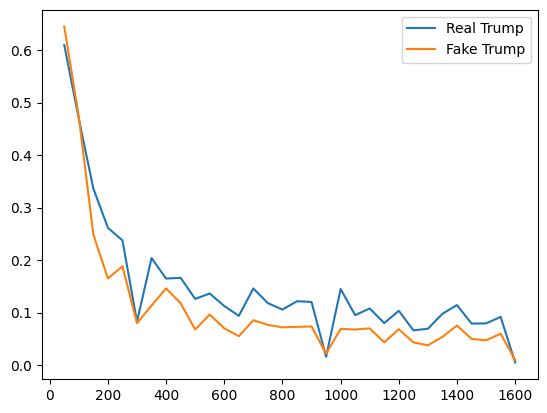

In [10]:
import pandas as pd

counter=0

average_true_trump=0
average_fake_trump=0

# Records if we need to stop early
flag=False

for epoch in range(epochs):
    print("Epoch number", epoch+1)
    #Have to read this csv file inside the epoch circle, otherwise nothing will be output by df file
    df = pd.read_csv("Trump Tweet Data/realdonaldtrump.csv", chunksize=batch_size)
    for chunk in df:
        counter+=1
        if(len(chunk["content"])!=batch_size):
            print(output.mean().item())
        input = chunk["content"].astype(str).tolist()
        glove_sequence = to_glove.toGloVe(input).to(device)
        glove_sequence = positional_embedding(glove_sequence)
        output = classifier(glove_sequence)
        
        #Train according to the real trump tweets
        optimizer.zero_grad()
        loss = criterion(output, torch.ones_like(output).to(device))
        average_true_trump += loss.item()
        loss.backward()
        optimizer.step()
        
        output = classifier(glove_sequence)
        
        list_of_random_sentences=[]
        k=0
        
        while(k<batch_size):
            #Get a random index of my sentences
            random_index = random.randint(0, read_list_size)
            
            sentence = read_list[random_index]
            if(sentence != "" and sentence != " " and sentence != " "):
                list_of_random_sentences.append(sentence)
                k+=1
            
        try:
            glove_sequence = to_glove.toGloVe(list_of_random_sentences).to(device)
        except:
            continue
        glove_sequence = positional_embedding(glove_sequence)
        output = classifier(glove_sequence)

        #Train according to the fake trump tweets
        optimizer.zero_grad()
        loss = criterion(output, torch.zeros_like(output).to(device))
        average_fake_trump += loss.item()
        loss.backward()
        optimizer.step()

        if(counter%50==0):
            x.append(counter)
            y_real.append(average_true_trump/50)
            y_fake.append(average_fake_trump/50)
            print("True Trump Loss: ", average_true_trump/50)
            print("Fake Trump Loss: ", average_fake_trump/50)

            plt.plot(x, y_real, label="Real Trump")
            plt.plot(x, y_fake, label="Fake Trump")
            plt.legend()
            plt.show()

            if((average_true_trump/50<0.01) and (average_fake_trump/50<0.01)):
                flag=True
                break;
            
            average_true_trump = 0
            average_fake_trump = 0

    if(flag):
        break

In [60]:
my_tweet = "I am Donald Trump and no one knows more about climate change than me"
glove_sequence = to_glove.toGloVe([my_tweet]).to(device)
glove_sequence = positional_embedding(glove_sequence)
output = classifier(glove_sequence)

print("The chance of this tweet is said by Donald Trump is: ", output.item()*100, "%")

The chance of this tweet is said by Donald Trump is:  92.37638711929321 %
